<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/search_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [10]:
# Total ../data/0&1/
url = '../../data/BtoA&D/total_text_week.csv'
total_text_week = pd.read_csv(url)

In [11]:
X_t = total_text_week.copy()
del X_t['tran_wend']
del X_t['text_week']

y_t = total_text_week['text_week']
y_t.value_counts() 

1    2403
2    1110
3     902
0     423
Name: text_week, dtype: int64

In [12]:
entire_random_guess_value = 2403 / 4838

In [13]:
print(X_t)
print(y_t)

      tran_week
0             0
1             0
2             1
3             1
4             0
...         ...
4833          0
4834          0
4835          0
4836          1
4837          0

[4838 rows x 1 columns]
0       1
1       0
2       1
3       3
4       0
       ..
4833    2
4834    1
4835    1
4836    2
4837    2
Name: text_week, Length: 4838, dtype: int64


In [14]:
# Sampled

In [15]:
url = '../../data/BtoA&D/sample_text_week.csv'
sampled_text_week = pd.read_csv(url)

X_s = sampled_text_week.copy()
del X_s['tran_wend']
del X_s['text_week']


y_s = sampled_text_week['text_week']
y_s.value_counts() 

0    423
1    423
2    423
3    423
Name: text_week, dtype: int64

In [16]:
sample_random_guess = 1 / 4

In [17]:
print(X_s)
print(y_s)

      tran_week
0             0
1             0
2             1
3             1
4             1
...         ...
1687          0
1688          0
1689          1
1690          0
1691          1

[1692 rows x 1 columns]
0       0
1       1
2       3
3       3
4       2
       ..
1687    3
1688    3
1689    0
1690    1
1691    3
Name: text_week, Length: 1692, dtype: int64


## SVM

## Seed == 100

In [18]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [19]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


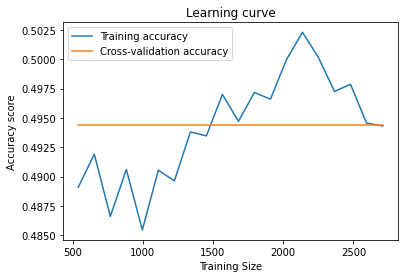

In [20]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [21]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [22]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


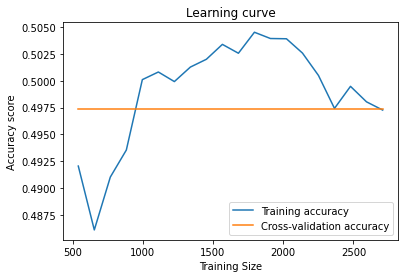

In [23]:
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [24]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [25]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)     

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


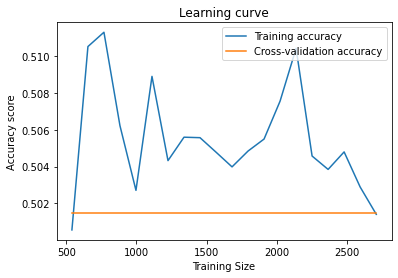

In [26]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [27]:
# learning curve considering different seeds 

In [28]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

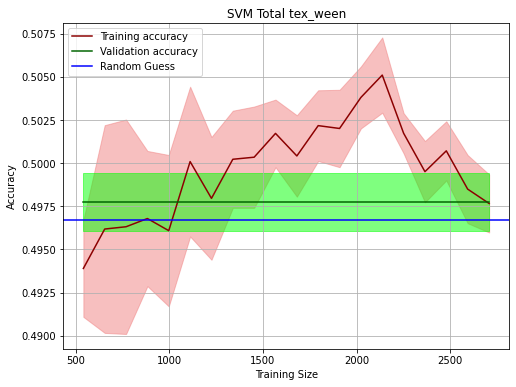

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Total tex_ween')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like SVM cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## Logistic Regression

## Seed 100

In [30]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [31]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


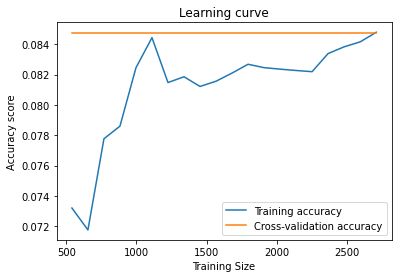

In [32]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [33]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [34]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


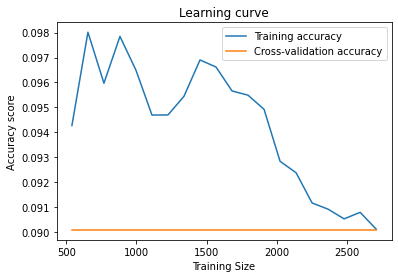

In [35]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [36]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [37]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)      

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


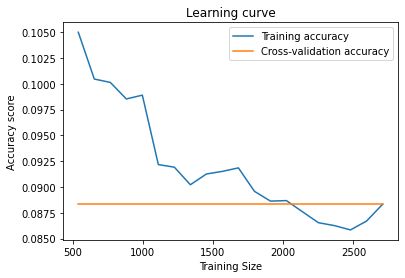

In [38]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [39]:
# learning curve considering different seeds 

In [40]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

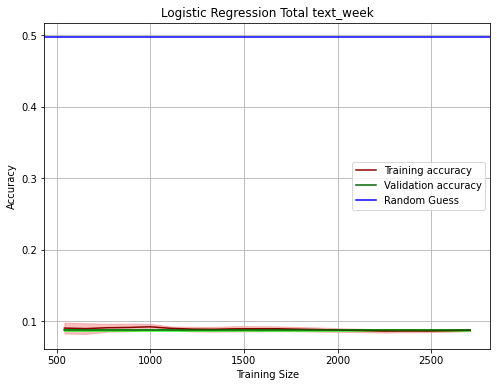

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Total text_week')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like LR cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## KNN

## Seed 100

In [42]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [43]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


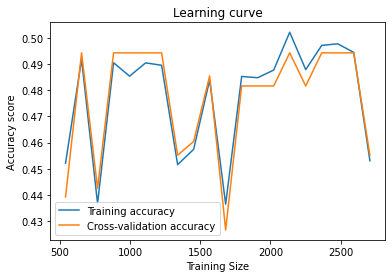

In [44]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='uniform', n_neighbors=34)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [45]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [46]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


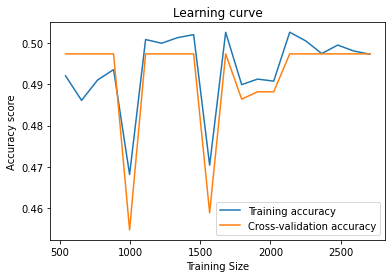

In [47]:
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform', n_neighbors=50)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [48]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [49]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


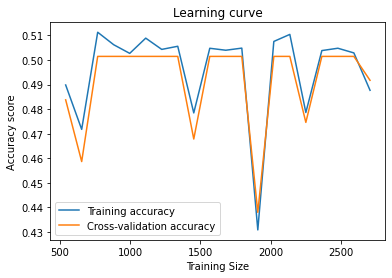

In [50]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, weights='uniform', n_neighbors=50)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [51]:
# learning curve considering different seeds 

In [52]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

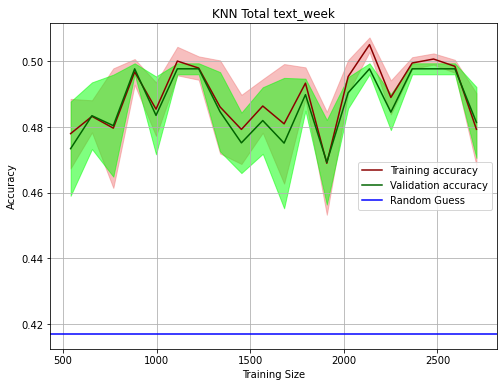

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Total text_week')
ax.axhline(y=0.4170, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like KNN cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they are constant throught all training sizes.

## Random Forest

## Seed 100

In [54]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [55]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


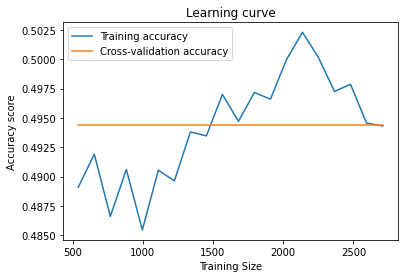

In [56]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='log2', min_samples_leaf=50, min_samples_split=14, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [57]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [58]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


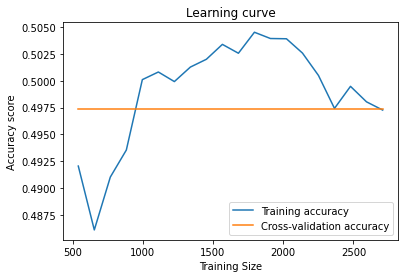

In [59]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='sqrt', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [60]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [61]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)    

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [ 541  655  769  883  997 1111 1225 1339 1453 1567 1681 1795 1909 2023
 2137 2251 2365 2479 2593 2708]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


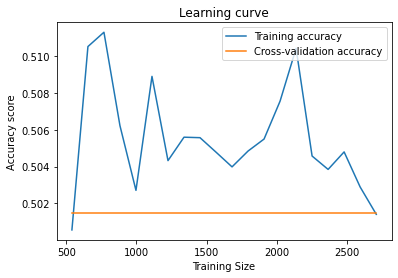

In [62]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=26, max_features='auto', min_samples_leaf=26, min_samples_split=50, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [63]:
# learning curve considering different seeds 

In [64]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

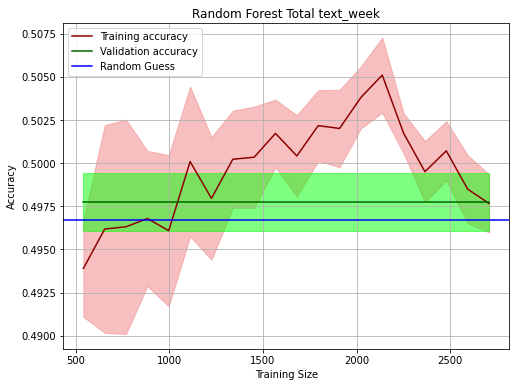

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Total text_week')
ax.axhline(y=entire_random_guess_value, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

They converge but the error is very high. It seems like LR cannot detect the level of depression and anxiety. Also, learning curve does not learn anything. i.e. they highly fluctuate.

# 2. sampled

# SVM 

## Seed 100

In [66]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [67]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


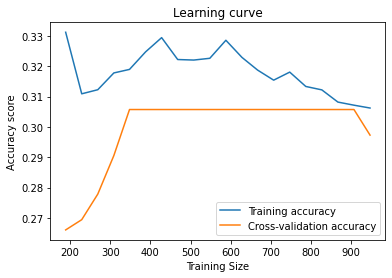

In [68]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [69]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [70]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


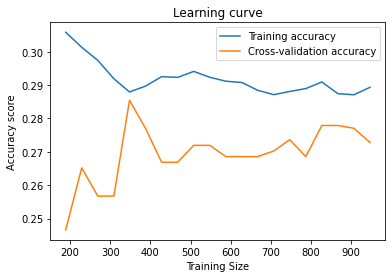

In [71]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [72]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [73]:
# svm_hyper_params = [ 
#                         {
#                         'gamma': np.logspace(-4, -1, 4),
#                         'C': np.logspace(-3, 1, 5),
#                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
#                         }
#                     ]

# # specify model
# svm_model = svm.SVC()

# # set up GridSearchCV()
# svm_model_cv = GridSearchCV(estimator = svm_model, 
#                             param_grid = svm_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=2)      

# # fit the model
# svm_model_cv.fit(X_train, y_train)
# print("best hyper parameters", svm_model_cv.best_params_)
# svm_y_pred = svm_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


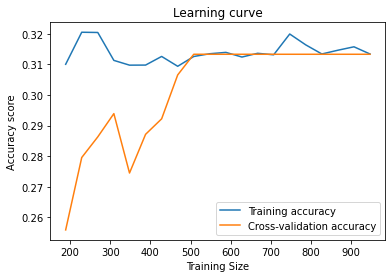

In [74]:
plot_model = svm.SVC(kernel='sigmoid', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [75]:
# learning curve considering different seeds 

In [76]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

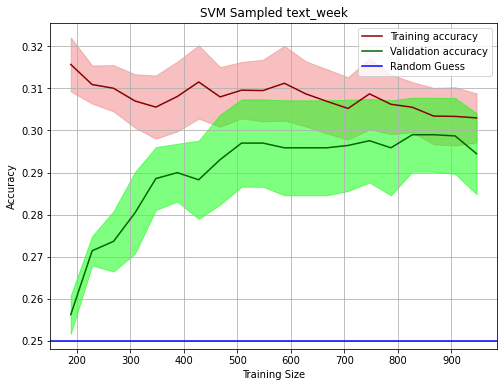

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM Sampled text_week')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# Logistic Regression

## Seed 100

In [78]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [79]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


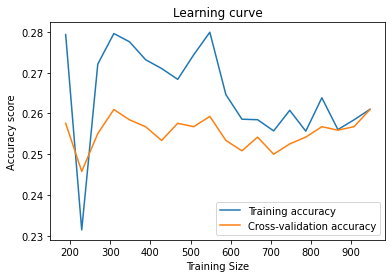

In [80]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', solver='saga')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [81]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [82]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


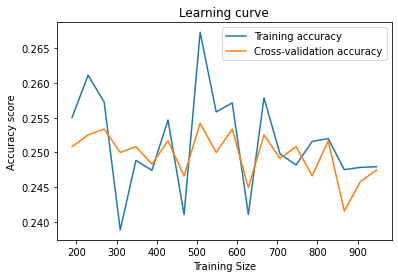

In [83]:
plot_model = LogisticRegression(C=0.001, multi_class='auto', penalty='l1', solver='saga')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [84]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [85]:
# log_hyper_params = [ 
#                         {
#                         'C': np.logspace(-4, 2, 7),
#                         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                         'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#                         'multi_class' : ['auto', 'ovr', 'multinomial']
#                         }
#                     ]

# # specify model
# log_model = LogisticRegression()

# # set up GridSearchCV()
# log_model_cv = GridSearchCV(estimator = log_model, 
#                             param_grid = log_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# log_model_cv.fit(X_train, y_train)
# print("best hyper parameters", log_model_cv.best_params_)
# log_y_pred = log_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, log_y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s


[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


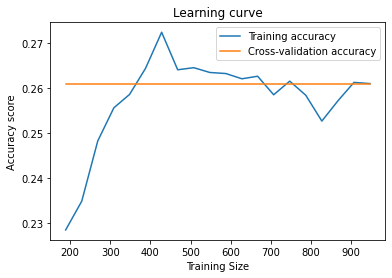

In [86]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [87]:
# learning curve considering different seeds 

In [88]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

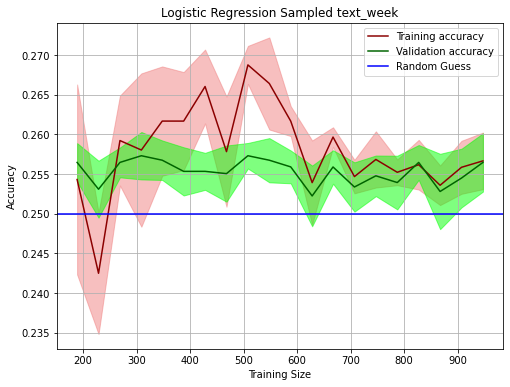

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Sampled text_week')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Seems like the learning is very unstable due to low training size.

# KNN

## Seed 100

In [90]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [91]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


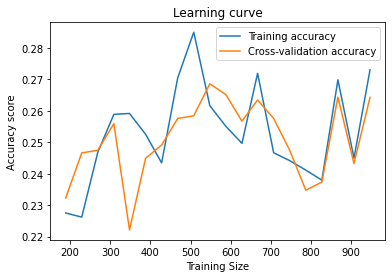

In [92]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=67, weights='distance', n_neighbors=2)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [93]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [94]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


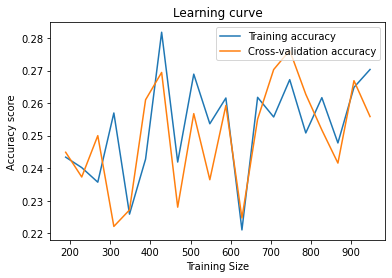

In [95]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=23, weights='distance', n_neighbors=2)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [96]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [97]:
# knn_hyper_params = [ 
#                         {
#                         'weights' : ['uniform', 'distance'],
#                         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'leaf_size' : np.linspace(2, 100, 10, dtype=int),
#                         'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# knn_model = KNeighborsClassifier()

# # set up GridSearchCV()
# knn_model_cv = GridSearchCV(estimator = knn_model, 
#                             param_grid = knn_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1)  

# # fit the model
# knn_model_cv.fit(X_train, y_train)
# print("best hyper parameters", knn_model_cv.best_params_)
# knn_y_pred = knn_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


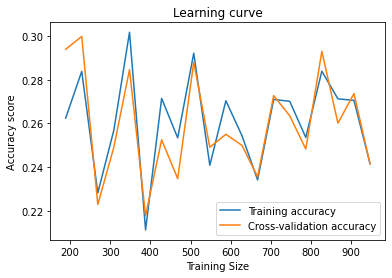

In [98]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=34, weights='distance', n_neighbors=7)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [99]:
# learning curve considering different seeds

In [100]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

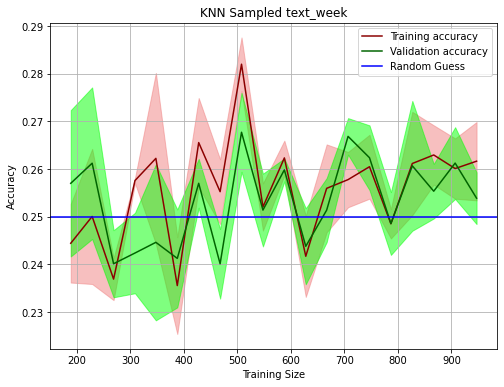

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Sampled text_week')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is constant throughout all training sizes. It seems like they the algorithm does not learn anything.

# Random Forest

## Seed 100

In [102]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [103]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


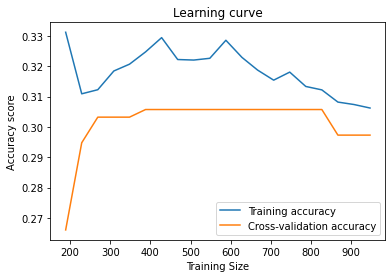

In [104]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=26, max_features='sqrt', min_samples_leaf=14, min_samples_split=2, n_estimators=27)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [105]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [106]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


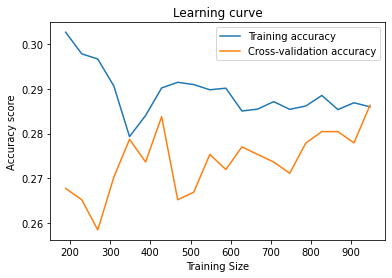

In [107]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='log2', min_samples_leaf=26, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [108]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [109]:
# rf_hyper_params = [ 
#                         {
#                             'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
#                             'max_features' : ['auto', 'sqrt', 'log2'],
#                             'bootstrap' : [True, False]

#                         }
#                     ]

# # specify model

# # THIS SECTION SHOULD BE CHANGED.
# # n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
# rf_model = RandomForestClassifier()

# # set up GridSearchCV()
# rf_model_cv = GridSearchCV(estimator = rf_model, 
#                             param_grid = rf_hyper_params, 
#                             scoring= 'accuracy', 
#                             cv = folds, 
#                             verbose = 2,
#                             return_train_score=True,
#                             n_jobs=-1) 

# # fit the model
# rf_model_cv.fit(X_train, y_train)
# print("best hyper parameters", rf_model_cv.best_params_)
# rf_y_pred = rf_model_cv.predict(X_test)

# # accuracy 
# print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# # f1 score 
# print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

# print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

[learning_curve] Training set sizes: [189 229 269 309 348 388 428 468 508 548 588 628 667 707 747 787 827 867
 907 947]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


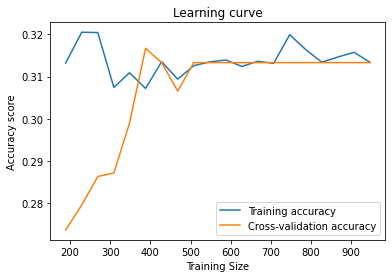

In [110]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=50, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [111]:
# learning curve considering different seeds

In [112]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

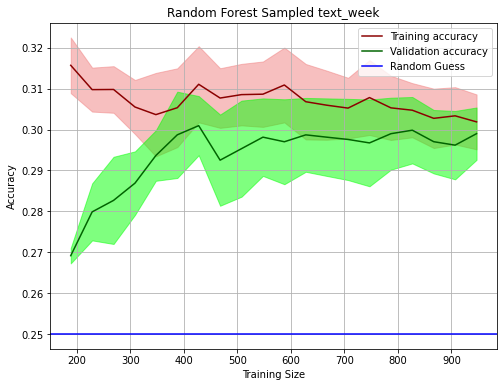

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Sampled text_week')
ax.axhline(y=sample_random_guess, color='blue', linestyle='-', label='Random Guess')
ax.legend()
ax.grid()

Accuracy of validation curve is relatively constant throughout all training sizes. It seems like they the algorithm does not learn anything. It is obvious that machine learning models cannot predict the level depression and anxiety.